In [132]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.colors as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from math import pi
from prince import PCA as PCA_Prince
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist

#### Using PCA to 5-Minute Crafts dataset

In [120]:
data_crafts = pd.read_csv('5-minute_crafts.csv')
data_crafts

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=lCePSP4lb-k,Wow! Let's go live! Epic decorations and DIYS,1,558,10825,45,8,3,1,4,1,5.625000,0,0,0.131818
1,v=G7O9iWWOtTY,EXTREME ROOM TRANSFORMATION || Cool Design Ide...,1,1020,184374,63,10,2,3,0,2,6.300000,0,0,0.112500
2,v=cd0u5IFxBdo,LATE SUMMER HACKS TO SAVE YOUR DAY,2,629,478170,34,7,0,7,0,2,4.857143,0,0,-0.300000
3,v=lWSXHFPqBfo,EVERY SMART PARENT KNOWS THESE USEFUL HACKS #s...,2,41,197359,51,8,1,7,1,1,6.375000,0,0,0.257143
4,v=qqPFeyd84Lg,SMART HACKS TO SAVE YOUR WEDDING DAY🤵‍👰‍💍🕊️,3,784,162025,43,7,0,7,0,2,6.142857,0,0,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,v=RA9GjoRhcSE,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,8,2,5.727273,1,0,0.350000
4900,v=KtetRv4kfog,How to DIY a magnetic memo holder l 5-MINUTE C...,1460,52,68908,51,10,1,3,6,3,5.100000,1,0,0.000000
4901,v=AEp338eSyDM,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000
4902,v=JmFQavE0sPM,3 tricks to clean without harsh chemicals l 5-...,1460,81,93121,59,10,1,2,7,1,5.900000,1,1,0.083333


In [121]:
data_var_crafts = data_crafts.drop(data_crafts.columns[0:2], axis=1)
data_var_crafts

,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,1,558,10825,45,8,3,1,4,1,5.625000,0,0,0.131818
1,1,1020,184374,63,10,2,3,0,2,6.300000,0,0,0.112500
2,2,629,478170,34,7,0,7,0,2,4.857143,0,0,-0.300000
3,2,41,197359,51,8,1,7,1,1,6.375000,0,0,0.257143
4,3,784,162025,43,7,0,7,0,2,6.142857,0,0,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,1460,55,76086,63,11,2,2,8,2,5.727273,1,0,0.350000
4900,1460,52,68908,51,10,1,3,6,3,5.100000,1,0,0.000000
4901,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000
4902,1460,81,93121,59,10,1,2,7,1,5.900000,1,1,0.083333


In [122]:
pca_crafts = PCA_Prince(n_components=2).fit(data_var_crafts)

In [123]:
crafts_comp = pca_crafts.row_coordinates(data_var_crafts)

In [124]:
groups = fcluster(linkage(data_var_crafts, method = 'ward', 
                          metric='euclidean'), 3, criterion = 'maxclust')
groups = groups-1 

Text(0, 0.5, 'Componente 2')

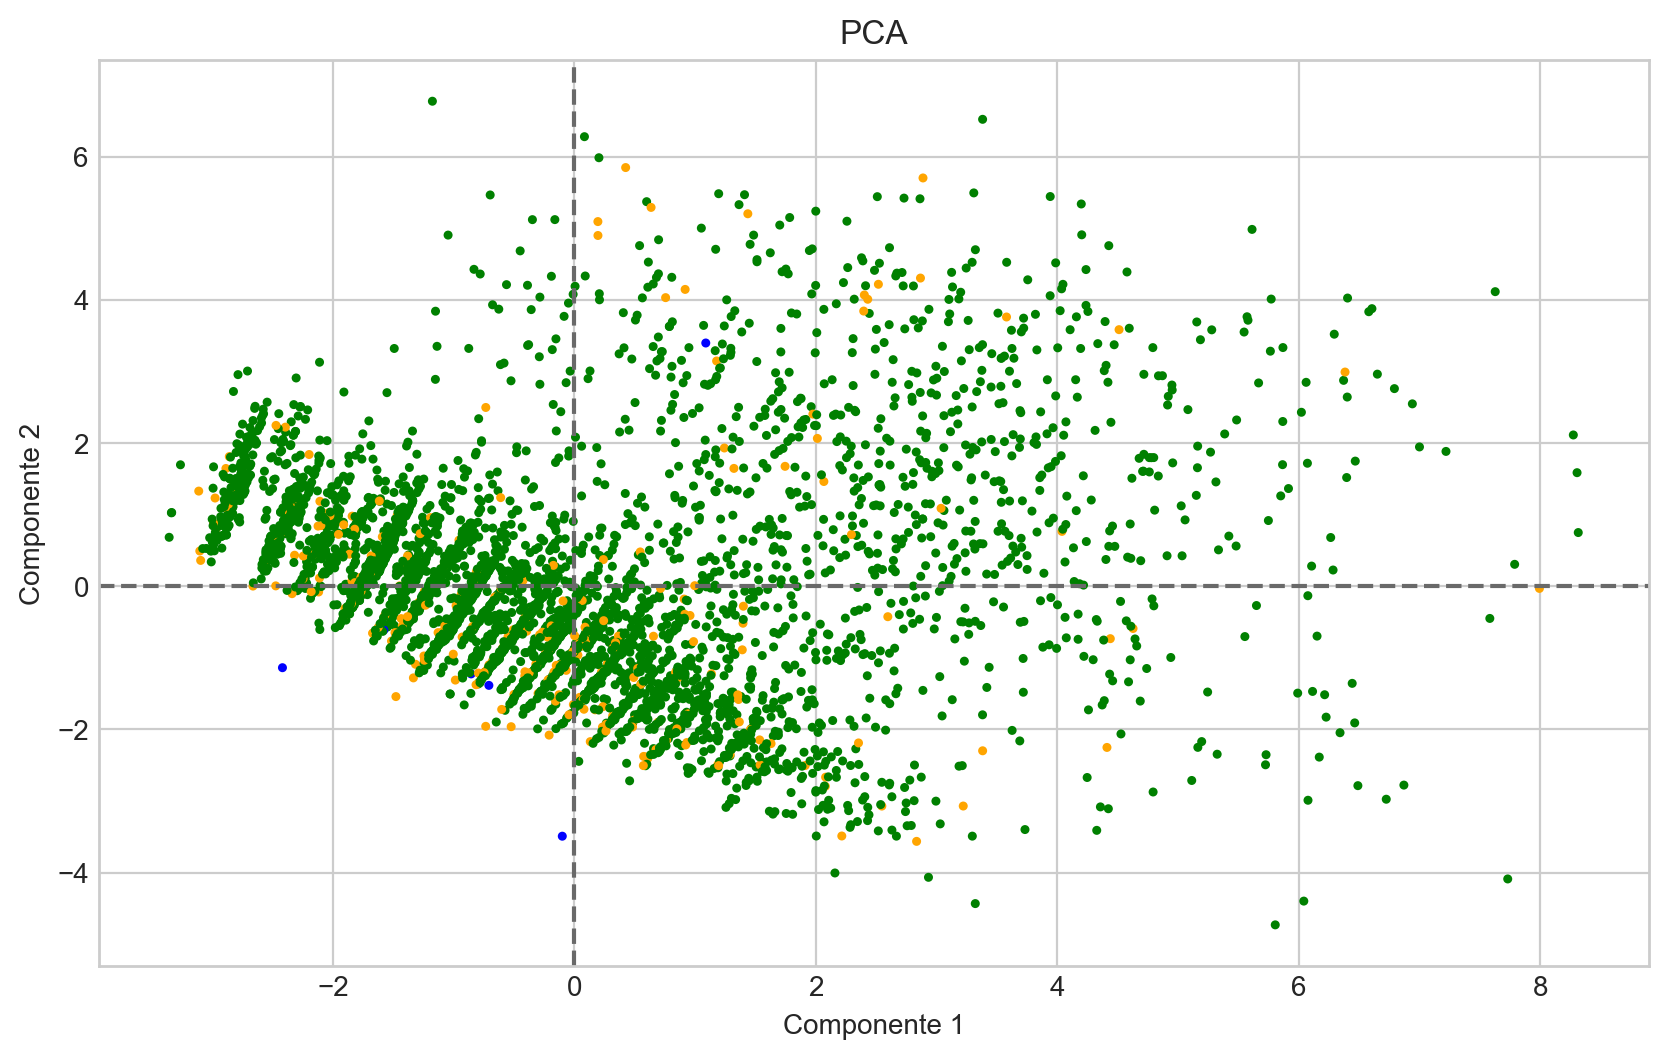

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
x = crafts_comp.values[:,0]
y = crafts_comp.values[:,1]
colors = ['green','blue','orange']

plt.style.use('seaborn-whitegrid')
plt.scatter(x, y, c=groups, cmap=cl.ListedColormap(colors),s=5)
plt.title('PCA')
plt.axhline(y = 0, color = 'dimgray', linestyle = '--')
plt.axvline(x = 0, color = 'dimgray', linestyle = '--')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

#### Using K-means on 5-Minute Crafts dataset

In [126]:
std_data = pd.DataFrame(StandardScaler().fit_transform(data_var_crafts),columns=data_var_crafts.columns,
                                   index = data_var_crafts.index)
print("Datos Estandarizados: ",std_data.shape)
std_data.head()

Datos Estandarizados:  (4904, 13)


,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,-1.991174,-0.516606,-0.445136,0.047741,-0.078751,2.819741,-2.031806,2.723186,-0.764058,0.252303,-3.526417,-2.571946,-0.244674
1,-1.991174,0.124884,-0.427255,1.384729,0.716710,1.699338,-1.244389,-0.209292,-0.036779,1.274091,-3.526417,-2.571946,-0.295861
2,-1.988797,-0.418022,-0.396983,-0.769307,-0.476482,-0.541467,0.330446,-0.209292,-0.036779,-0.910050,-3.526417,-2.571946,-1.388859
3,-1.988797,-1.234464,-0.425917,0.493404,-0.078751,0.578936,0.330446,0.523828,-0.764058,1.387623,-3.526417,-2.571946,0.087397
4,-1.986420,-0.202804,-0.429557,-0.100813,-0.476482,-0.541467,0.330446,-0.209292,-0.036779,1.036214,-3.526417,-2.571946,-0.026161


Text(0.5, 1.0, 'Codo de Jambu')

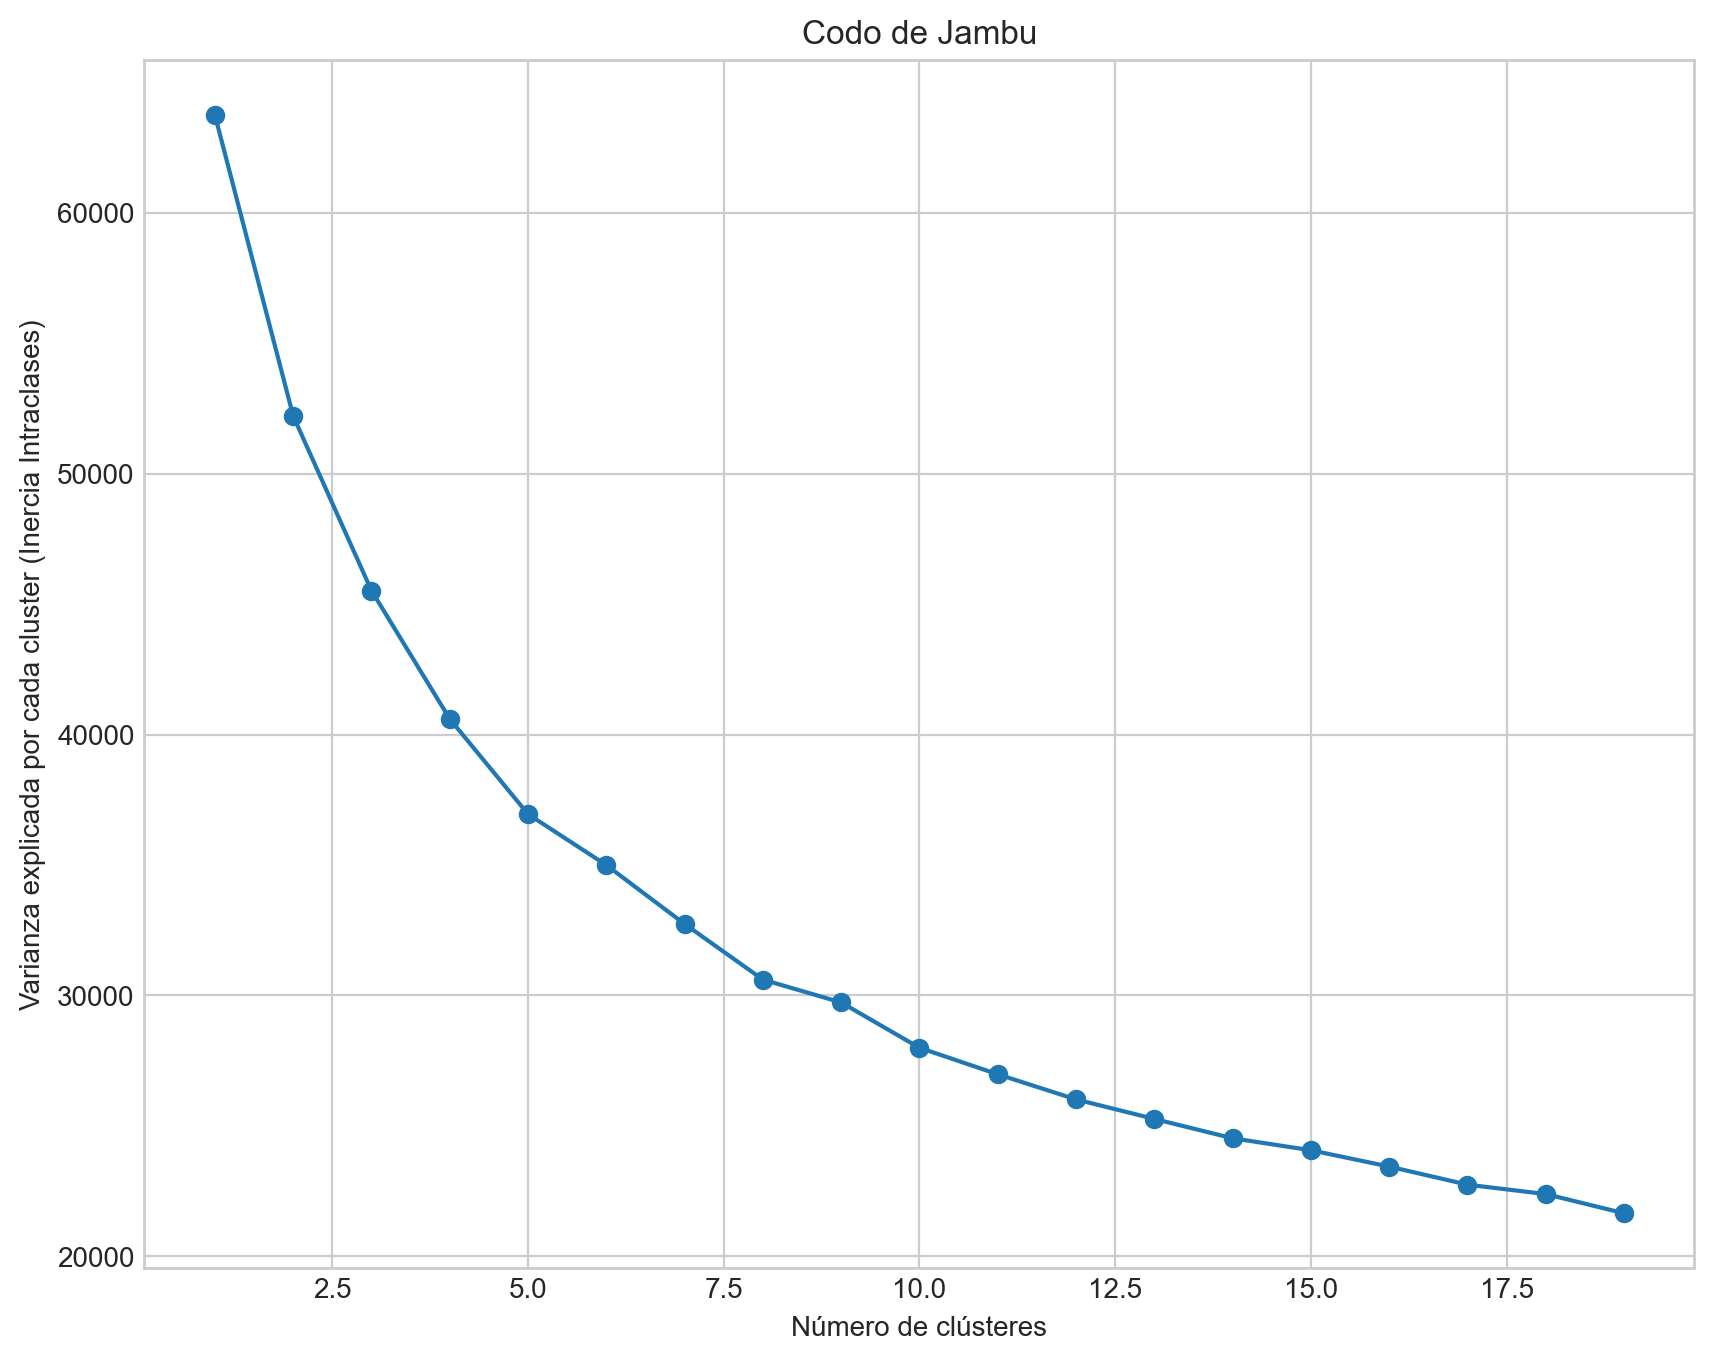

In [127]:
## Selecting optimal number of clusters via elbow method
jambu = range(1, 20)
NC = range(1, 20)
kmeans_list = [KMeans(n_clusters=i) for i in NC]
variance = [kmeans_list[i].fit(std_data).inertia_ for i in range(len(kmeans_list))]

fig, ax = plt.subplots(1,1, figsize = (10,8), dpi = 200)
ax.plot(NC,variance,'o-')
ax.set_xlabel('Número de clústeres')
ax.set_ylabel('Varianza explicada por cada cluster (Inercia Intraclases)')
ax.set_title('Codo de Jambu')

In [128]:
kmeans_crafts = KMeans(n_clusters=9, n_init=10, max_iter=300)
kmeans_crafts.fit(std_data)
center = np.array(kmeans_crafts.cluster_centers_)

Shape for standardized data:  (4904, 13)
Shape for components:  (4904, 2)


Text(0.5, 1.0, 'K-means Clusters')

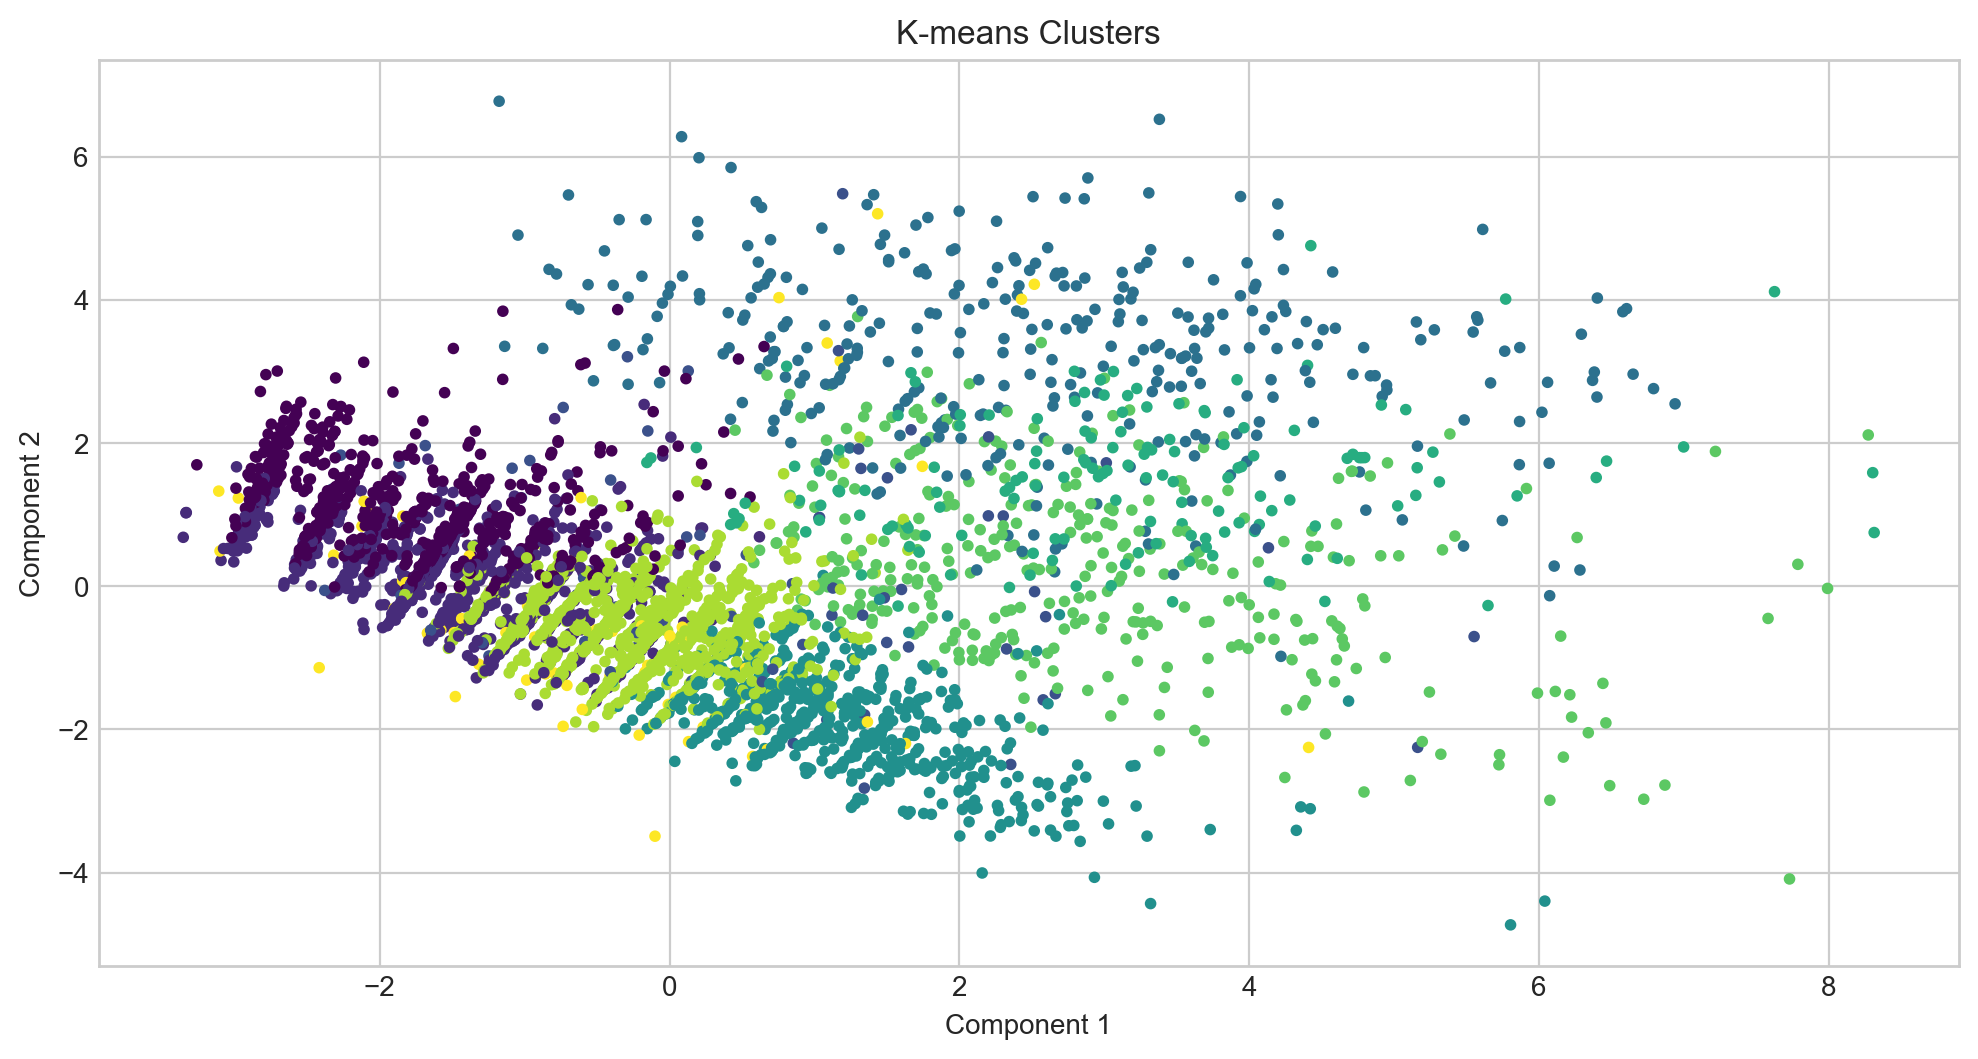

In [143]:
pca_kmeans = PCA(n_components=2)
components = pca_kmeans.fit_transform(std_data)
print("Shape for standardized data: ",std_data.shape)
print("Shape for components: ",components.shape)

fig, ax = plt.subplots(1,1, figsize = (12,6), dpi = 200)
ax.scatter(components[:, 0], components[:, 1],c = kmeans_crafts.predict(std_data), cmap='viridis_r', s=10)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('K-means Clusters')

In [144]:
kmeans_crafts2 = KMeans(n_clusters=9, n_init=150, max_iter=1000)
kmeans_crafts2.fit(std_data)
center2 = np.array(kmeans_crafts2.cluster_centers_)

Shape for standardized data:  (4904, 13)
Shape for components:  (4904, 2)


Text(0.5, 1.0, 'K-means Clusters')

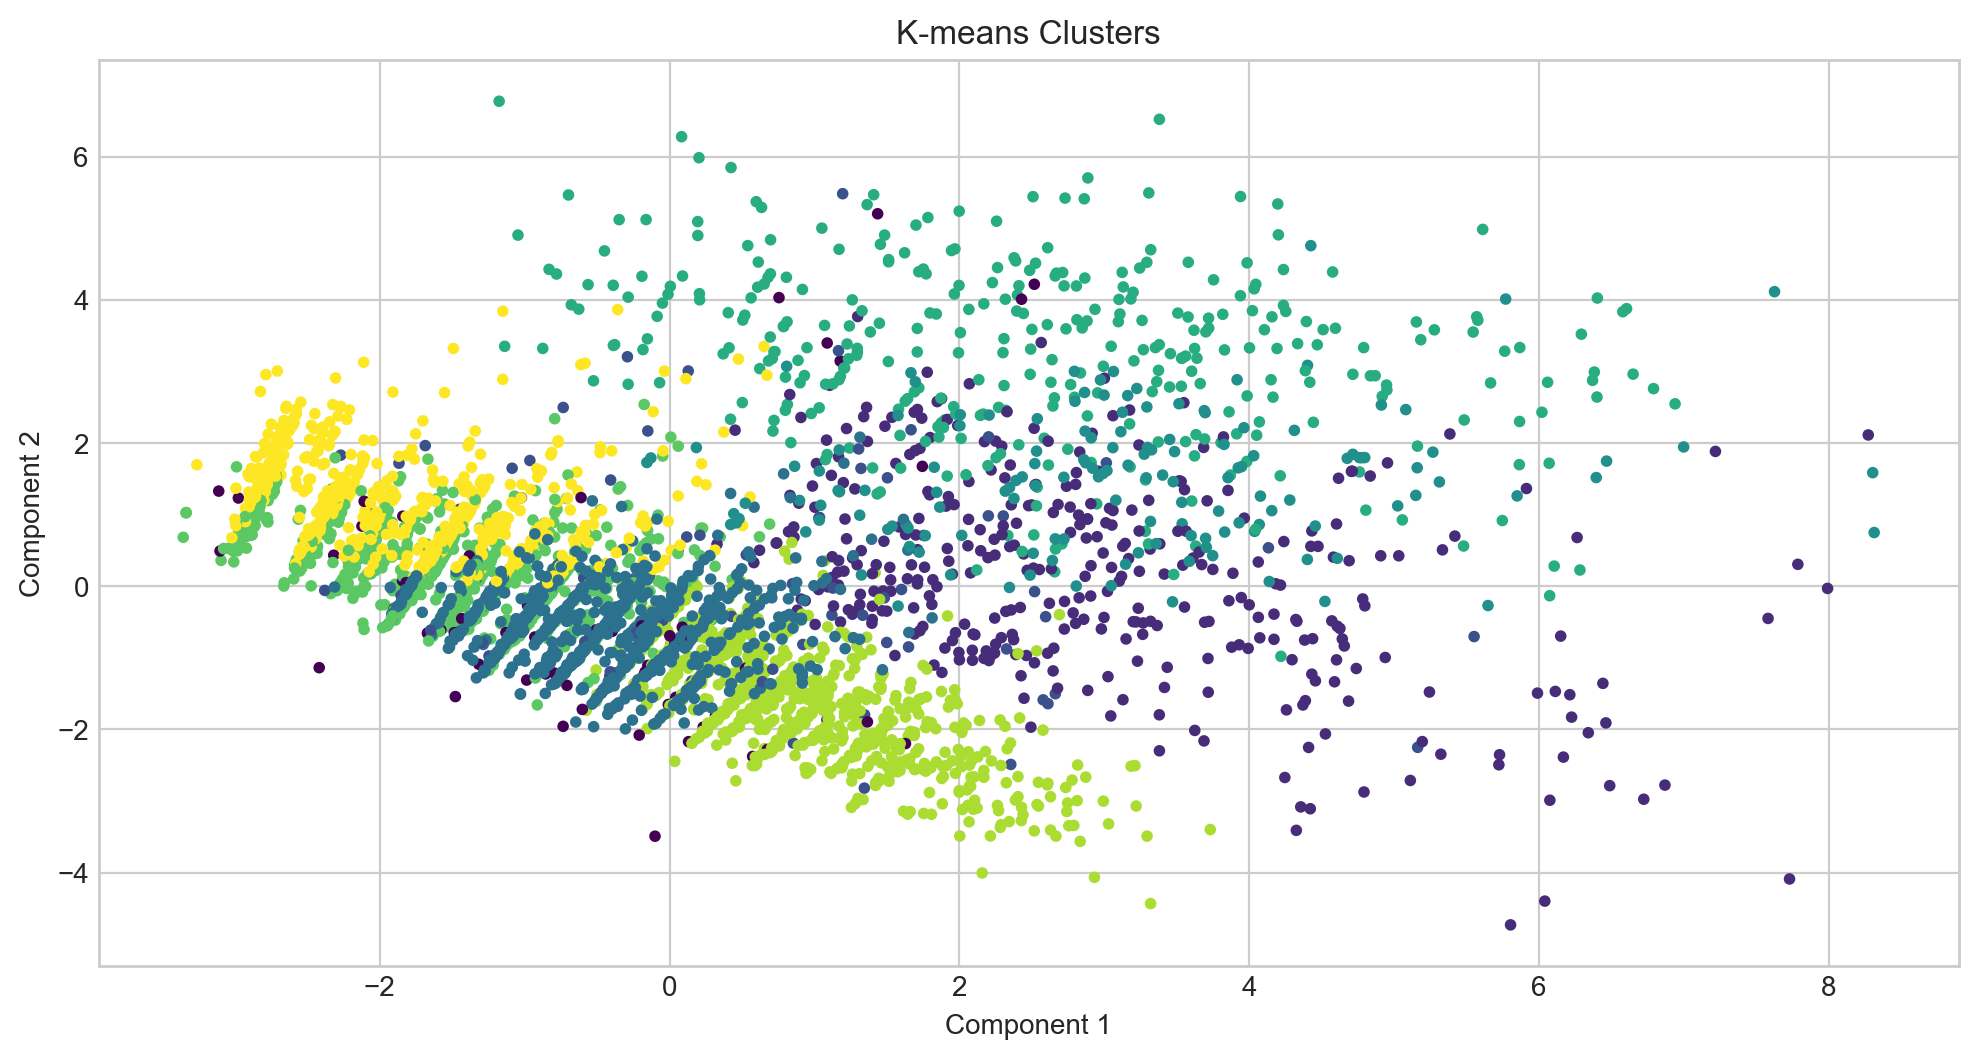

In [145]:
pca_kmeans2 = PCA(n_components=2)
components2 = pca_kmeans2.fit_transform(std_data)
print("Shape for standardized data: ",std_data.shape)
print("Shape for components: ",components2.shape)

fig, ax = plt.subplots(1,1, figsize = (12,6), dpi = 200)
ax.scatter(components2[:, 0], components2[:, 1],c = kmeans_crafts2.predict(std_data), cmap='viridis_r', s=10)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('K-means Clusters')

In [146]:
kmeans_crafts3 = KMeans(n_clusters=9, n_init=300, max_iter=2000)
kmeans_crafts3.fit(std_data)
center = np.array(kmeans_crafts3.cluster_centers_)

Shape for standardized data:  (4904, 13)
Shape for components:  (4904, 2)


Text(0.5, 1.0, 'K-means Clusters')

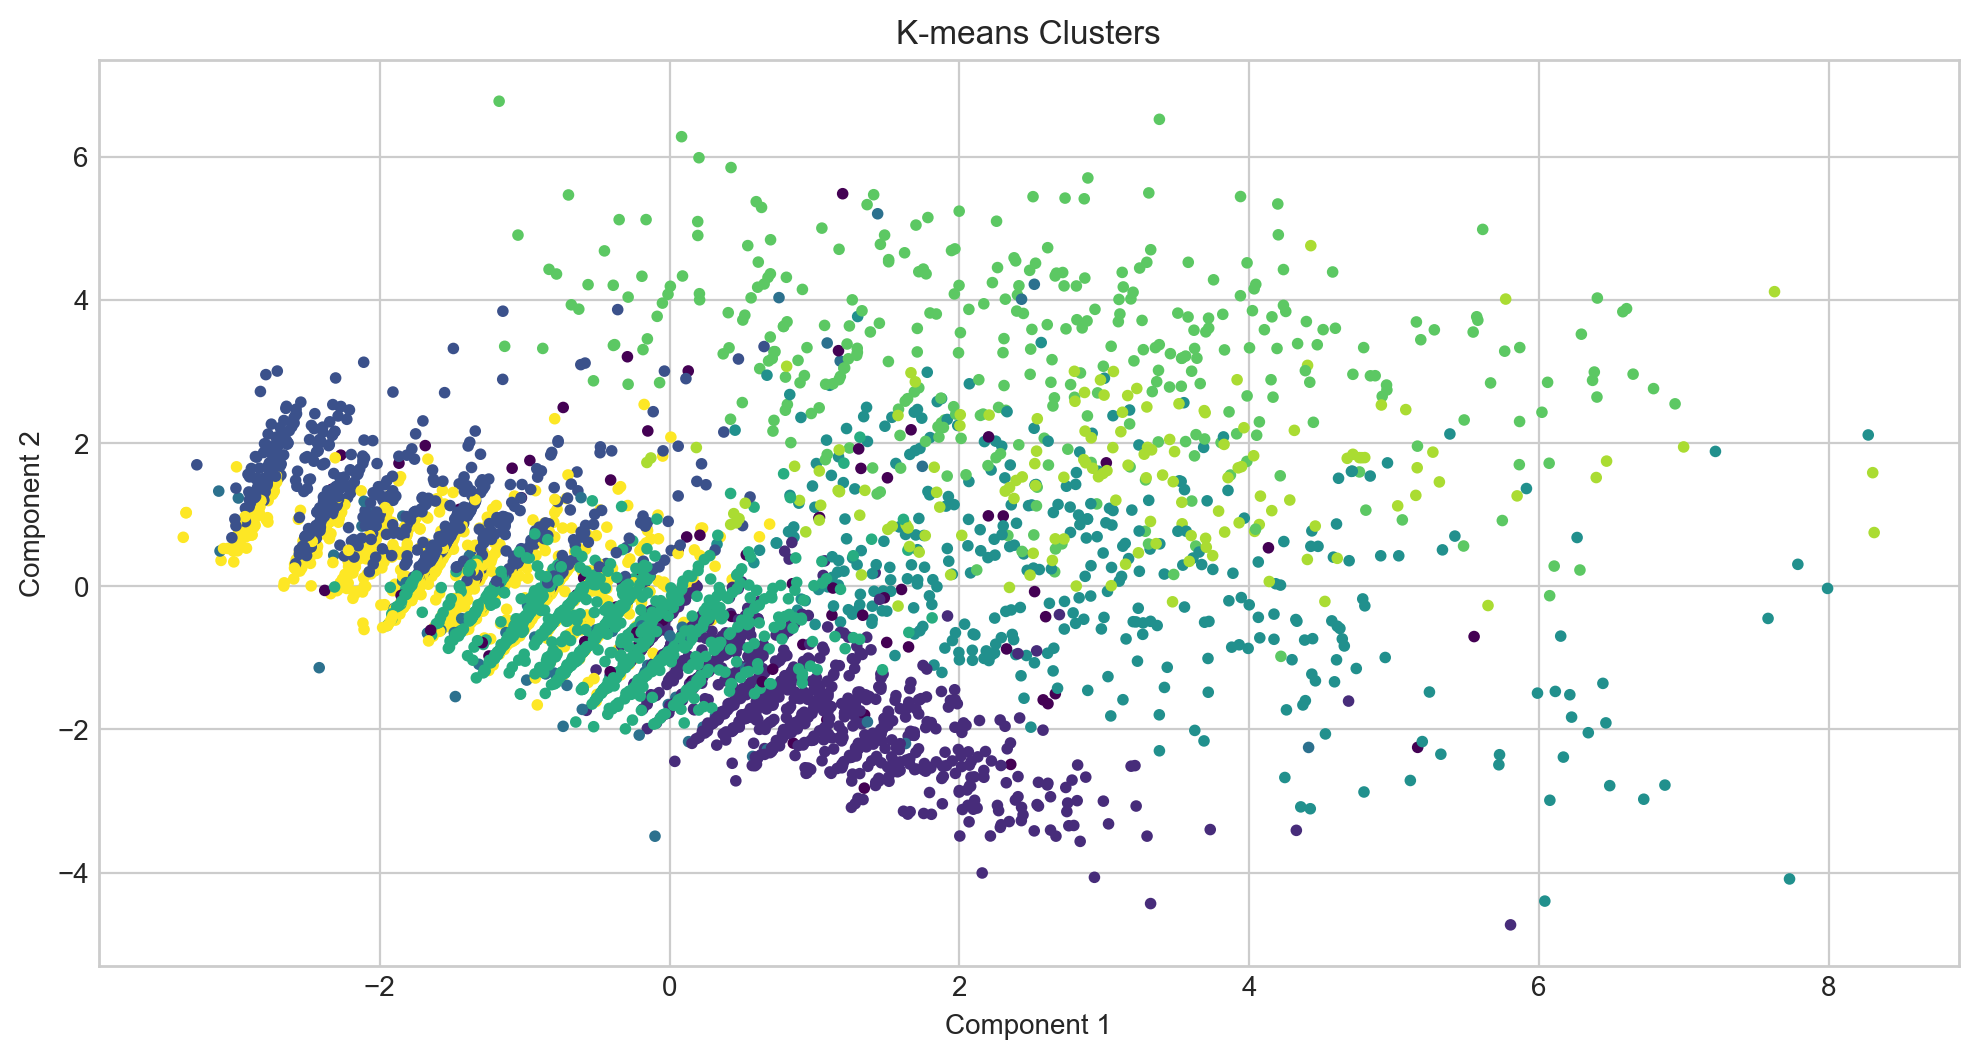

In [147]:
pca_kmeans3 = PCA(n_components=2)
components3 = pca_kmeans3.fit_transform(std_data)
print("Shape for standardized data: ",std_data.shape)
print("Shape for components: ",components3.shape)

fig, ax = plt.subplots(1,1, figsize = (12,6), dpi = 200)
ax.scatter(components3[:, 0], components3[:, 1],c = kmeans_crafts3.predict(std_data), cmap='viridis_r', s=10)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('K-means Clusters')